# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = [32,32]

# How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.


Random samples:


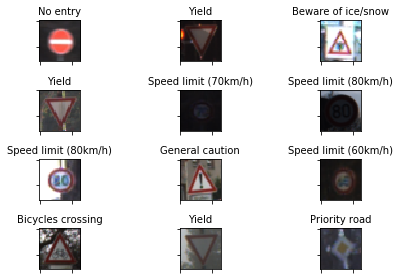


Samples distribution:
Label                                             -> Count                        
Speed limit (20km/h)                              |180                             
Speed limit (30km/h)                              |1980                            
Speed limit (50km/h)                              |2010                            
Speed limit (60km/h)                              |1260                            
Speed limit (70km/h)                              |1770                            
Speed limit (80km/h)                              |1650                            
End of speed limit (80km/h)                       |360                             
Speed limit (100km/h)                             |1290                            
Speed limit (120km/h)                             |1260                            
No passing                                        |1320                            
No passing for vehicles over 3.5 metric tons      |180

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def read_label_names(filename):
    with open(filename, newline='', encoding="utf8") as csvfile:
        spamreader = csv.reader(csvfile)
        vals = [x[1] for x in spamreader][1:]
        return vals

label_names = read_label_names('signnames.csv')

def show_samples(n_samples, images, labels, randomize = False):
    # Show a random sign with its label
    for sample_n in range(n_samples):
#         n = 1
#         while y_train_input[n] != 21:
        if randomize:
            n = random.randint(0, len(images))
        else:
            n = sample_n
        ax = plt.subplot(np.ceil(n_samples/3),3,sample_n+1)
        ax.set_title(label_names[labels[n]], fontsize=10)
        ax.imshow(images[n])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.tight_layout()
    plt.show()
    

def print_train_labels_count():
    print()
    print("Samples distribution:")
    print("%-50s%-32s" % ("Label", "-> Count"))
    histogram = np.histogram(y_train, bins=np.arange(43))
    for i in range(len(histogram[0])):
        print("%-50s|%-32d" % (label_names[histogram[1][i]], histogram[0][i]))
        
print()
print("Random samples:")
show_samples(12, X_train, y_train, randomize = True)

print_train_labels_count()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

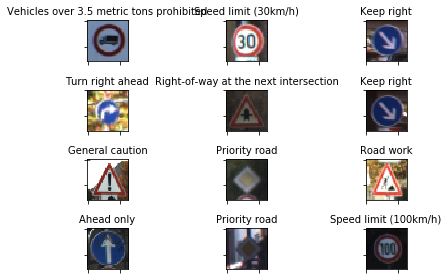

After preprocessing:


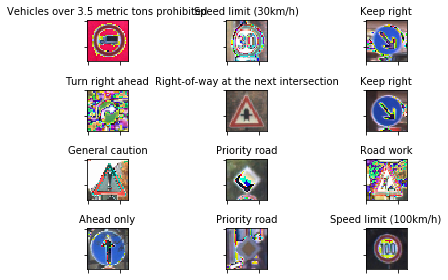

In [4]:
# Normalize input data
import numpy as np
import cv2

# Normalize each pixel, center around 0
normalize = True
# Apply a sharpening filter
sharpen = False
# Histogram equalization
equalize = False
# Adaptive histogram equalization
clahe = False
# Gaussian blur
gaussian_blur = False

def equalize_histogram(img):
    img_hist_equalized = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    channels = cv2.split(img_hist_equalized)
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels,img_hist_equalized)
    img_hist_equalized = cv2.cvtColor(img_hist_equalized, cv2.COLOR_YCrCb2RGB)
    return img_hist_equalized

def preprocess_image(img):
    if equalize:
        img = equalize_histogram(img)
    if clahe:
        cl = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(2,2))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2Lab);
        channels = cv2.split(img)
        # apply to the 'L' channel
        channels[0] = cl.apply(channels[0])
        img = cv2.merge(channels)
        img = cv2.cvtColor(img, cv2.COLOR_Lab2RGB);
    if normalize:
        img = (img - [128])/128
    if gaussian_blur:
        img = cv2.GaussianBlur(img,(3,3),0)
    if sharpen:
        kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel)
    return img

show_samples(12, X_test, y_test)

print("After preprocessing:")

X_train = np.array([preprocess_image(im) for im in X_train ])
X_test =  np.array([preprocess_image(im) for im in X_test ])

show_samples(12, X_test, y_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  
After many different attempts at enhancing the image data, I only kept normalization and centering around zero.

I tried the option of normalization and orientation

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.model_selection import train_test_split


def augment(img):
    random.seed()
    
    rows,cols = img.shape[:2]
    
    M = cv2.getRotationMatrix2D((cols/2,rows/2),random.uniform(-10.0, 10.0),1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = cv2.resize(dst,None,fx=random.uniform(1.3, 1.4), fy=random.uniform(1.01,1.03), interpolation = cv2.INTER_LINEAR)

    dx  = np.shape(dst)[0] - 32
    dy  = np.shape(dst)[1] - 32
    return dst[dx:dx+32, dy:dy+32]
        
augmented = np.array([augment(img) for img in X_train])

print("Adding %s augmented samples to the training set..." % len(augmented))
X_train = np.concatenate((X_train, augmented))
y_train = np.concatenate((y_train, [x for x in y_train]))

n_train = len(X_train)

# Delete to free up some memory
del augmented

# Separate a part of the test set for validation--- test_size will actually be the validation size
# Don't run twice without running the previous cell first!!!
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.2)
print("Training size:", len(X_train), " labels size:", len(y_train) )
print("Test size:", len(X_test), " labels size:", len(y_test) )
print("Validation size:", len(X_validation), " labels size:", len(y_validation) )

Adding 34799 augmented samples to the training set...
Training size: 69598  labels size: 69598
Test size: 10104  labels size: 10104
Validation size: 2526  labels size: 2526


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Using OpenCV's methods for geometric transformations.

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def Network(x, weights, biases, keep_prob, keep_prob_conv):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    layer = 0
    #Conv layer 3x3 filter , depth 32
    conv1 = tf.nn.conv2d(x, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv1 = tf.nn.relu(conv1)
    layer += 1

    conv2 = tf.nn.conv2d(activation_conv1, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv2 =  tf.nn.relu(conv2)
    layer += 1
        
    conv3 = tf.nn.conv2d(activation_conv2, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv3 =  tf.nn.relu(conv3)
    layer += 1

    conv4 = tf.nn.conv2d(activation_conv3, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv4 =  tf.nn.relu(conv4)
    layer += 1
    
    conv5 = tf.nn.conv2d(activation_conv4, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv5 =  tf.nn.relu(conv5)
    layer += 1
    # 2x2 max pooling
    pool1 = tf.nn.max_pool(activation_conv5, [1, 2,2, 1], [1,2,2,1], padding='VALID')
    
    #Conv layer 3x3 filter , depth 64
    
    conv8 = tf.nn.conv2d(pool1, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv8 =  tf.nn.relu(conv8)
    layer += 1

    conv9 = tf.nn.conv2d(activation_conv8, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv9 =  tf.nn.relu(conv9)
    layer += 1
    
    conv10 = tf.nn.conv2d(activation_conv9, weights[layer], [1,1,1,1], padding='SAME') + biases[layer]
    activation_conv10 =  tf.nn.relu(conv10)
    layer += 1
    
    pool2 = tf.nn.max_pool(activation_conv10, [1, 2,2, 1], [1,2,2,1], padding='VALID')
    
    flat = flatten(pool2)
    
    fc1 = tf.matmul(flat, weights[layer]) + biases[layer]
    activation_fc1 = tf.nn.dropout(tf.nn.relu(fc1), keep_prob)
    layer += 1
    
    fc2 = tf.matmul(activation_fc1, weights[layer]) + biases[layer]
    activation_fc2 = tf.nn.dropout(tf.nn.relu(fc2), keep_prob)
    layer += 1
    
    logits = tf.matmul(activation_fc2, weights[layer]) + biases[layer]
    
    return logits

In [7]:
#Training pipeline

rate = 0.0009
# Hyperparameters
mu = 0
sigma = 0.1
beta = 0.01

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
keep_prob_conv = tf.placeholder(tf.float32)

weights = [
    tf.Variable(tf.truncated_normal((3,3,3,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,32), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,32,64), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((4096, 120), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((120, 84), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal((84, n_classes), mean = mu, stddev = sigma))
]
biases = [
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(120)),
    tf.Variable(tf.zeros(84)),
    tf.Variable(tf.zeros(n_classes))
]

one_hot_y = tf.one_hot(y, n_classes)

logits = Network(x, weights, biases, keep_prob, keep_prob_conv)

#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=tf.one_hot(y, n_classes))
loss_operation = tf.reduce_mean(cross_entropy)

regularizer = tf.reduce_sum([tf.nn.l2_loss(w) for w in weights])
loss = tf.reduce_mean(loss_operation + beta * regularizer)
  
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [8]:
# Accuracy evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob_conv: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I began by implementing the LeNet architecture developed in the previous lessons with few changes in the dataset.The model was having ~94% validation accuracy.Spent some time on few papers and other implementation as reference to understand the details.
In the current network I've started plyaing with learning rate and layesr sizes and applied weights to L2.

The final architecture consists of following hyperparameters:
- 5 convolutions with 3x3 filters and a depth of 32.x14
- 2x2 max pooling.
- 3 convolutions with 3x3 filters and a depth of 64.
- Another 2x2 max pooling.
- 2 fully connected layers, of 120 and 84 neurons each.
- The output layer(size 43).



Training...

Shuffle Done
EPOCH 1 ...
Validation Accuracy = 0.680

Shuffle Done
EPOCH 2 ...
Validation Accuracy = 0.901

Shuffle Done
EPOCH 3 ...
Validation Accuracy = 0.932

Shuffle Done
EPOCH 4 ...
Validation Accuracy = 0.955

Shuffle Done
EPOCH 5 ...
Validation Accuracy = 0.963

Shuffle Done
EPOCH 6 ...
Validation Accuracy = 0.973

Shuffle Done
EPOCH 7 ...
Validation Accuracy = 0.970

Shuffle Done
EPOCH 8 ...
Validation Accuracy = 0.959

Shuffle Done
EPOCH 9 ...
Validation Accuracy = 0.971

Shuffle Done
EPOCH 10 ...
Validation Accuracy = 0.969

Shuffle Done
EPOCH 11 ...
Validation Accuracy = 0.967

Shuffle Done
EPOCH 12 ...
Validation Accuracy = 0.975

Shuffle Done
EPOCH 13 ...
Validation Accuracy = 0.977

Shuffle Done
EPOCH 14 ...
Validation Accuracy = 0.973

Shuffle Done
EPOCH 15 ...
Validation Accuracy = 0.976

Shuffle Done
EPOCH 16 ...
Validation Accuracy = 0.975

Shuffle Done
EPOCH 17 ...
Validation Accuracy = 0.973

Shuffle Done
EPOCH 18 ...
Validation Accuracy = 0.979

Shuffl

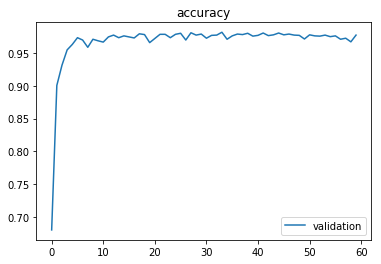

Model saved


In [9]:
from sklearn.utils import shuffle

EPOCHS = 60 
BATCH_SIZE = 100
# The (inverse) dropout probability for the convolutional layers
KEEP_PROB_CONV_LAYERS = 0.8
# The (inverse) dropout probability for the rest of the layers in the network
KEEP_PROB = 0.5

# Enable these to log and graph more info about the loss and accuracy as training happens.
# Can cause out of memory errors on large networks!
graph_loss = False
graph_training_accuracy = False

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    valid_losses = []
    train_losses = []
    train_accuracies = []
    valid_accuracies = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        print('Shuffle Done')
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            res = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB, keep_prob_conv: KEEP_PROB_CONV_LAYERS})
        
        validation_accuracy = evaluate(X_validation, y_validation)
        valid_accuracies.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if graph_loss:
            train_loss = sess.run(loss_operation, feed_dict={x: X_train, y: y_train, keep_prob: 1.0, keep_prob_conv: 1.0})
            valid_loss = sess.run(loss_operation, feed_dict={x: X_validation, y: y_validation, keep_prob: 1.0, keep_prob_conv: 1.0})
            valid_losses.append(valid_loss)
            train_losses.append(train_loss)

        if graph_training_accuracy:
            training_accuracy = evaluate(X_train, y_train)
            train_accuracies.append(training_accuracy)
            print("Test Accuracy = {:.3f}".format(training_accuracy))
            print("Diff = {:.3f}".format(training_accuracy - validation_accuracy))
            
        print()
    
    if graph_loss:
        plt.plot(valid_losses, label="validation")
        plt.plot(train_losses, label="training")
        plt.legend()
        plt.title("loss")
        plt.show()

    if graph_training_accuracy:
        plt.plot(train_accuracies, label="training")
    
    plt.plot(valid_accuracies, label="validation")
    plt.legend(loc=4)
    plt.title("accuracy")
    plt.show()
    
    saver.save(sess, 'lenet')
    print("Model saved")

In [10]:
# Test accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.970


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


###### **Answer:**
I ended up using the Adam optimizer, with batch size=100 for 60 epochs.I tried playing with different hyperparameter for dropout ,epoch and batchsize.
The dropout probability is of 0.2 for the convolutional layers, and 0.5 for the rest of the layers. The regularization coefficient is 0.01.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**   
The current approch was based on trial-and-error for fine tuning.

The goal was understanding and learn more about fine tuning parameters and check for overfitting.

I learned that adding more convolutional network was more efficient than adding more filters.USed Adam optimizer mentioned in LeNet lab. Final setting used were:
- batch size=100
- epochs = 60
- learning rate=0.0009
- mu=0
- sigma=0.1
- dropout keep probability=0.5
- dropout probabilty for conv layer=0.8



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

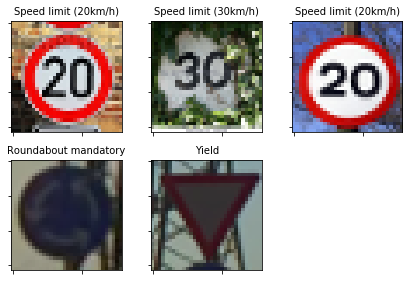

In [11]:
### Load the images and plot them here.

import csv
import os
import matplotlib.image as mpimg

path = 'test_data/'
def read_csv_file():
    with open(path+'test_data.csv', newline='', encoding="utf8") as csvfile:
        spamreader = csv.reader(csvfile)
        vals = [(x[0],x[1]) for x in spamreader]
        return vals

files_and_labels = read_csv_file()    
files = [x for (x,y) in files_and_labels]

extra_imgs_orig =  [cv2.imread(path+f)[:,:,::-1] for f in files]
extra_img_count = len(extra_imgs_orig)

X_extra = [preprocess_image(img) for img in extra_imgs_orig]
y_extra  = [int(y) for (x,y) in files_and_labels]

np.set_printoptions(precision=2)

show_samples(5, extra_imgs_orig, y_extra, randomize = False)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**  
Five image samples are shown above and they have slightly different shapes.


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._
This will get the accuracy aaround 90%


**Answer:**

My architecture seems to get around 85-95% accuracy on the test data. The accuracy is very sensitive to the number of epochs the network was trained, when overfitting is avoided generalization works a lot better.

Augmenting playes big role for training data. The accuracy varies quite a bit each time data is generated when training the same network, because of the augmenting the training samples.

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
np.set_printoptions(precision=2)

import csv
import os
import matplotlib.image as mpimg

# Define some operations
predicted = tf.argmax(logits, 1)
softmax_out = tf.nn.softmax(logits)

correct = 0
predictions = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    res = sess.run([softmax_out, predicted], feed_dict = {x: X_extra,keep_prob:1})
    
    for (prediction, processed_image, softmax_probs, label, j) in zip(res[1], X_extra, res[0], y_extra, range(extra_img_count)):
        top_k = sess.run(tf.nn.top_k(softmax_probs, k=5))
        
        if prediction == label:
            correct += 1
            
        predictions.append((prediction, label, top_k))
        
          
print("Test Set Accuracy = {:.3f}".format(correct/extra_img_count))


INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.938


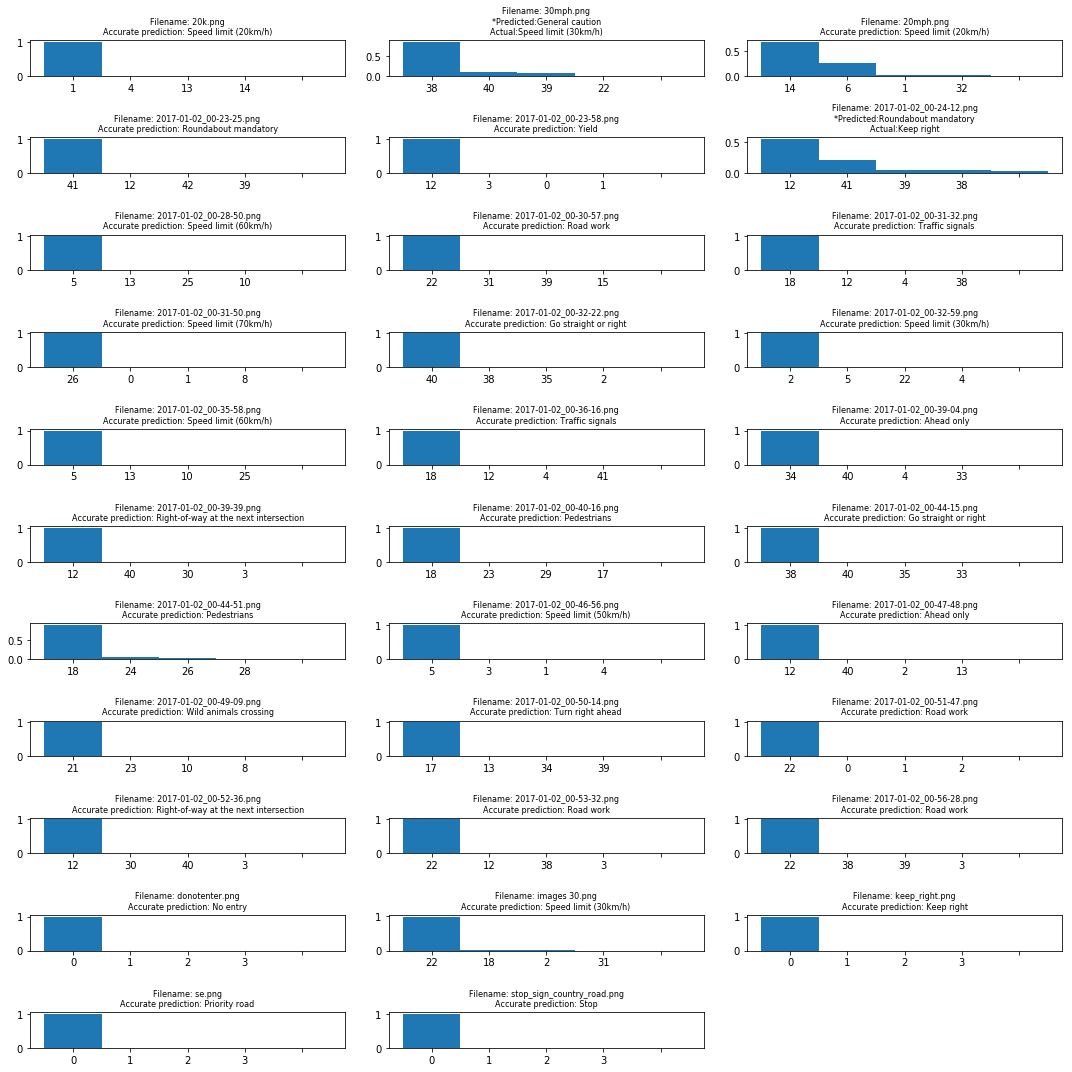

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

i=0
f, axs = plt.subplots(5,5,figsize=(15,15))

# TODO SHOW WHETHER THE PREDICTION IS BETWEEN THE TOP-5 / show labels
for ((prediction, label, top_l), img) in zip(predictions, files):
    ax = plt.subplot(np.ceil(len(predictions)/3),3, i + 1)
    title = "Filename: %s\n" % img
    if prediction == label:
        title += "Accurate prediction: %s" % label_names[prediction]
    else:
        title += "*Predicted:%s\nActual:%s" % (label_names[prediction], label_names[label])
        
    ax.set_title(title, fontsize=8)
    plt.bar(range(len(top_l[1])), top_l[0], 1)
    ax.set_xticklabels(top_l[1])
    plt.subplot(np.ceil(len(predictions)/3),3, i + 1)
    i+=1
plt.tight_layout()
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  
Most predictions are surprisingly confident, with probabilities very close to 100%, but I can also notice sometimes the  network is very confident when classifying images with the *wrong* label. 

The image which contains the 30kph limit blocked by leaves(30mph.png), in general makes the network very uncertain, which is not very surprising. The correct label is mostly always in the top 3, so the features contained in the numbers are most certainly recognized.  
Some other cases are more surprising, like the 20mph.png case, where there is a bit of uncertainty between classifying it as a 20 or 30 kph sign, or for '2017-01-02_00-24-12.png', which is correctly classified as a 'turn right' sign, but also gets some very close probabilities assigned for labels 34, 36 and 33 which have some reasonably close features.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.